01_EDA_preprocessing_03dataset_part1.ipynb

# Preprocessing and EDA on 03_wildfire_dataset - part 1

Rodrigo Becerra Carrillo

https://github.com/bcrodrigo

# Introduction

In this notebook, I'll perform preprocessing and EDA the following dataset:

- `03_wildfire_dataset` 

**Source:** https://www.kaggle.com/datasets/elmadafri/the-wildfire-dataset/data

## Directory Structure

It is assumed that the directory structure for this dataset is organized as follows
```bash
data_preprocessing/
└── 03_wildfire_dataset/
    ├── test/
    │   ├── fire/
    │   │   ├── Both_smoke_and_fire/
    │   │   └── Smoke_from_fires/
    │   └── nofire/
    │       ├── Fire_confounding_elements/
    │       ├── Forested_areas_without_confounding_elements/
    │       └── Smoke_confounding_elements/
    ├── train/
    │   ├── fire/
    │   │   ├── Both_smoke_and_fire/
    │   │   └── Smoke_from_fires/
    │   └── nofire/
    │       ├── Fire_confounding_elements/
    │       ├── Forested_areas_without_confounding_elements/
    │       └── Smoke_confounding_elements/
    └── val/
        ├── fire/
        │   ├── Both_smoke_and_fire/
        │   └── Smoke_from_fires/
        └── nofire/
            ├── Fire_confounding_elements/
            ├── Forested_areas_without_confounding_elements/
            └── Smoke_confounding_elements/
```

## Steps
Due to the directory structure, we will need to create 1 large dataframe to inspect all the sets of images in the `train`, `test` and `val` directories. Therefore, we'll proceed as follows:

1. Create a dataframe listing all images, labels, channels, width and height
2. Review that all images are the correct number of channels (3)
3. Filter rows in the dataframe to save annotation files for `train`, `val` and `test`.

# Import Usual Libraries

In [1]:
import numpy as np
import pandas as pd
import os

## Define Paths to Custom Modules

In [2]:
import sys 
sys.path.append('..')

['/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python312.zip',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/lib-dynload',
 '',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages',
 '/Users/rodrigo/Documents/Github/medium_articles/packages_and_modules/example_package',
 '..']

In [5]:
sys.path

['/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python312.zip',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/lib-dynload',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages',
 '..']

## Import Helper Functions

In [6]:
from src.data.dataset_contents import all_subdir_list

In [7]:
help(all_subdir_list)

Help on function all_subdir_list in module src.data.dataset_contents:

all_subdir_list(path_to_dataset, levels)
    Function that makes a list of subdirectories in a dataset folder.

    Parameters
    ----------
    path_to_dataset : string
        Path (absolute or relative) to contents of image dataset folder.
        The dataset is assumed to have the following structure
        dataset/
            folder1/
                subfolder1.1/
            folder2/
                subfolder2.1/
                subfolder2.2/
            folder3/

    levels : integer
        Number of nested levels in the image dataset

    Returns
    -------
    List
        Subdirectory list



In [8]:
from src.data.dataset_contents import all_images_list

In [9]:
help(all_images_list)

Help on function all_images_list in module src.data.dataset_contents:

all_images_list(path_to_dataset, directory_list, label_list)
    Function that lists all images contained in the subdirectories of a dataset,
    opens each one by one, and returns a dataframe containing all image names as well
    as their labels and size.

    Parameters
    ----------
    path_to_dataset : string
        Path (absolute or relative) to contents of image dataset folder.
        The dataset is assumed to have the following structure
        dataset/
            folder1/
                subfolder1.1/
            folder2/
                subfolder2.1/
                subfolder2.2/
            folder3/

    directory_list : list
        List with all the subdirectories contained in the dataset.
    label_list : list
        List with the numeric categories for each of the directories in `directory_list`

    Returns
    -------
    Dataframe
        All the contents of the dataset into a dataframe cont

## Define Path to Dataset

In [12]:
path_to_dataset = '../data_preprocessing/03_wildfire_dataset/'

In [13]:
dir_list = all_subdir_list(path_to_dataset,3)
dir_list

Made a list with 15 directories


['./test/fire/Smoke_from_fires',
 './test/fire/Both_smoke_and_fire',
 './test/nofire/Forested_areas_without_confounding_elements',
 './test/nofire/Fire_confounding_elements',
 './test/nofire/Smoke_confounding_elements',
 './train/fire/Smoke_from_fires',
 './train/fire/Both_smoke_and_fire',
 './train/nofire/Forested_areas_without_confounding_elements',
 './train/nofire/Fire_confounding_elements',
 './train/nofire/Smoke_confounding_elements',
 './val/fire/Smoke_from_fires',
 './val/fire/Both_smoke_and_fire',
 './val/nofire/Forested_areas_without_confounding_elements',
 './val/nofire/Fire_confounding_elements',
 './val/nofire/Smoke_confounding_elements']

We have the full list of subdirectories to search for images. Now make a list of labels according to `dir_list`. Note 'fire' is labelled as 1 and 'non-fire' as 0

In [14]:
label_list = [1,1,0,0,0,1,1,0,0,0,1,1,0,0,0]

In [15]:
# let's doublecheck they are the same length
len(dir_list) == len(label_list)

True

Import custom functions to make a dataframe with all the images

In [16]:
df = all_images_list(path_to_dataset,dir_list,label_list)

Completed list of images
Reading from image list


Invalid SOS parameters for sequential JPEG
libpng warning: iCCP: profile 'ProPhoto RGB': 0h: PCS illuminant is not D50


issue encountered with
Index 924
Image ./train/fire/Both_smoke_and_fire/51320603897_d8b7036c7c_o.png


Invalid SOS parameters for sequential JPEG
libpng warning: iCCP: known incorrect sRGB profile


Finished reviewing all images


Note that there was one image (index 924) where there were issues encountered. The rest are warnings, and otherwise everything ran smoothly.

Let's check the shape of the dataframe:

In [17]:
df.shape

(2699, 6)

For now I'm going to save `df` as a csv, to have a working copy for future reference.

In [19]:
df.to_csv('03_full_image_list.csv',index = False)

# Check Dataframe for Items with Issues

First, let's review what where the items that showed issues. These were flagged by the `except` clause in `all_images_list()`

In [20]:
items_with_issues = df[df['issues'] == 'yes'].copy()
items_with_issues

label                                               item  channels  \
924      1  ./train/fire/Both_smoke_and_fire/51320603897_d...         0   

     width  height issues  
924      0       0    yes

In [21]:
print(items_with_issues['item'].values)

['./train/fire/Both_smoke_and_fire/51320603897_d8b7036c7c_o.png']


Let's change to the directory containing the figure

In [22]:
curr_wd = os.getcwd()
os.chdir('../data_preprocessing/03_wildfire_dataset/')

In [23]:
from torchvision.io import read_image

In [24]:
image_path = items_with_issues['item'].values[0]
image_path

'./train/fire/Both_smoke_and_fire/51320603897_d8b7036c7c_o.png'

In [25]:
img = read_image(image_path)

libpng warning: iCCP: profile 'ProPhoto RGB': 0h: PCS illuminant is not D50


RuntimeError: At most 8-bit PNG images are supported currently.

Let's open it with PIL

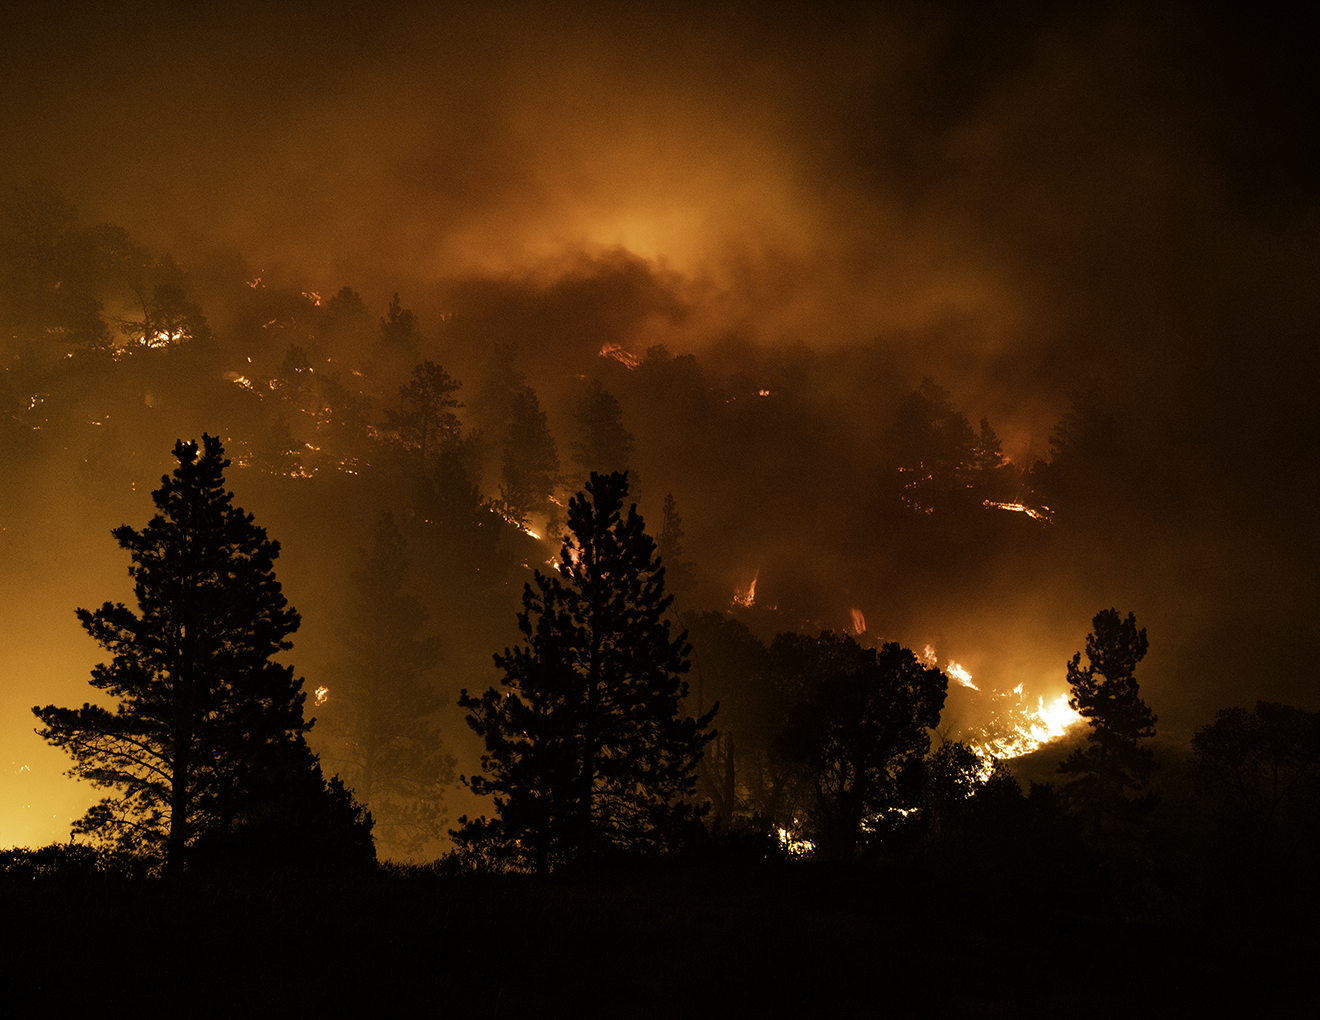

In [26]:
from PIL import Image
png_img = Image.open(image_path)
png_img

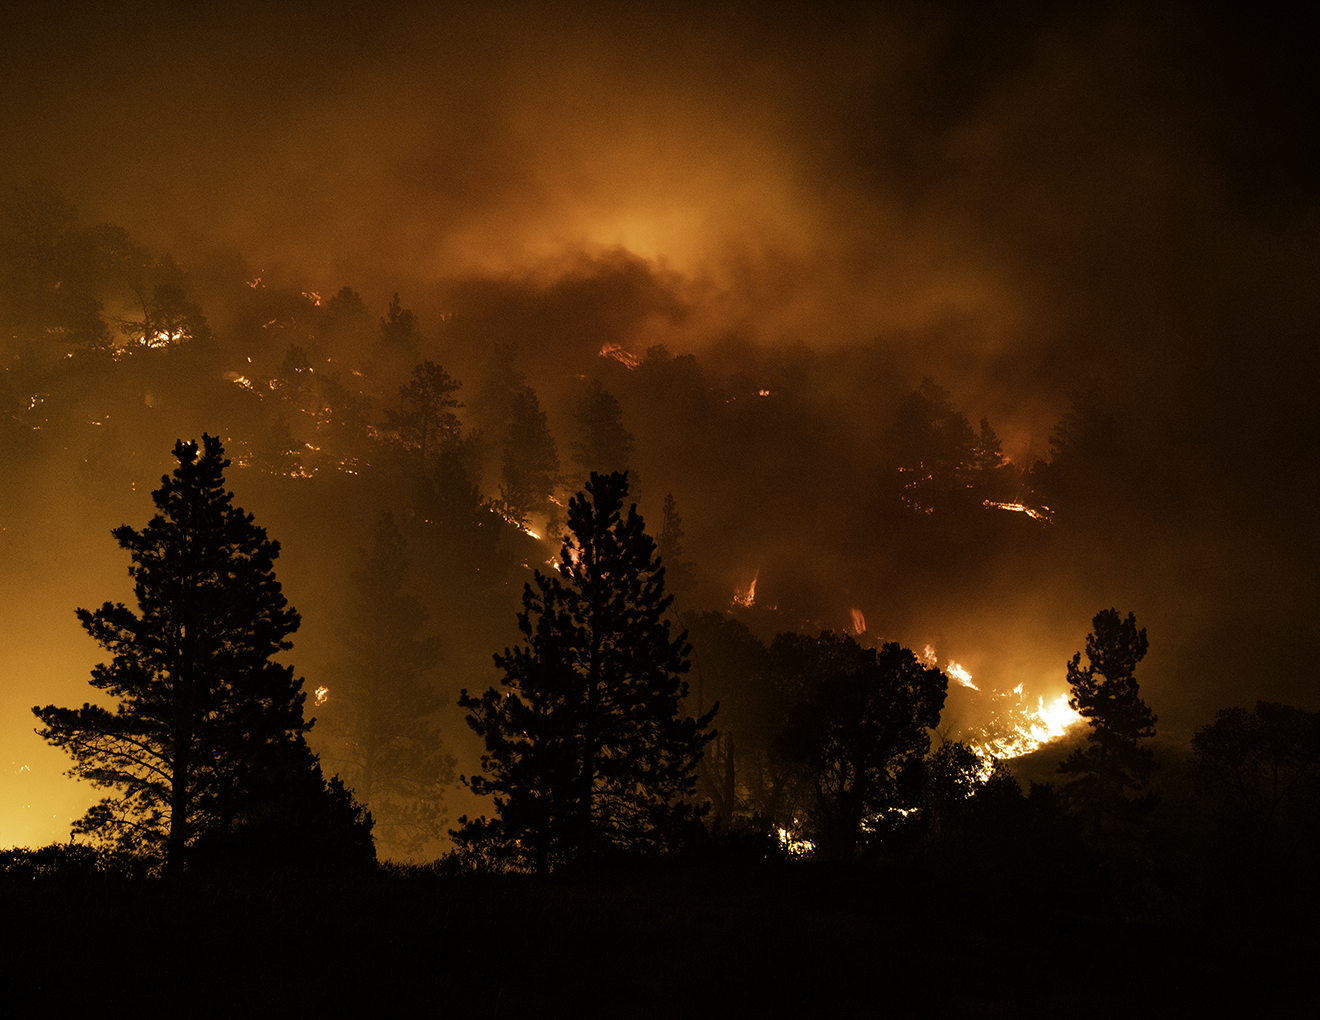

In [29]:
png_img.convert('RGB')

In [27]:
image_path

'./train/fire/Both_smoke_and_fire/51320603897_d8b7036c7c_o.png'

In [28]:
# Let's update the image path, save a new image, and try to open it with torchvision
new_image_path = '.' + image_path.split('.')[1] + '_updated.png'
new_image_path

'./train/fire/Both_smoke_and_fire/51320603897_d8b7036c7c_o_updated.png'

In [29]:
png_img.convert('RGB').save(new_image_path,'png')

In [30]:
img_new = read_image(new_image_path)

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


It seems Pytorch is able to read this image now. So we'll update the original `df` with the new information

In [31]:
img_new.shape

torch.Size([3, 1020, 1320])

In [32]:
items_with_issues

label                                               item  channels  \
924      1  ./train/fire/Both_smoke_and_fire/51320603897_d...         0   

     width  height issues  
924      0       0    yes

In [33]:
df.iloc[924,:]

label                                                       1
item        ./train/fire/Both_smoke_and_fire/51320603897_d...
channels                                                    0
width                                                       0
height                                                      0
issues                                                    yes
Name: 924, dtype: object

In [34]:
df.iloc[924,1] = new_image_path
df.iloc[924,1]

'./train/fire/Both_smoke_and_fire/51320603897_d8b7036c7c_o_updated.png'

In [35]:
df.loc[924,'channels'] = img_new.shape[0]
df.loc[924,'width'] = img_new.shape[1]
df.loc[924,'height'] = img_new.shape[2]
df.loc[924,'issues'] = 'no'

In [36]:
df.loc[924,:]

label                                                       1
item        ./train/fire/Both_smoke_and_fire/51320603897_d...
channels                                                    3
width                                                    1020
height                                                   1320
issues                                                     no
Name: 924, dtype: object

Lastly, let's change to the original jupyter notebook directory and update the csv file we had originally made

In [37]:
os.chdir(curr_wd)

In [38]:
df.to_csv('03_image_list.csv',index = False)

# Checking Number of Channels

Now let's check for the number of channels, as this parameter is important for the dataloader.

In [39]:
df['channels'].value_counts()

channels
3    2687
4      12
Name: count, dtype: int64

We can see that most of the images are 3 channels, but 12 have 4 channels. Likely RGBA.

In [40]:
df_wrong_channels = df.query('channels !=3').copy()
df_wrong_channels

label                                               item  channels  \
36        1  ./test/fire/Smoke_from_fires/28347651877_ce21e...         4   
43        1  ./test/fire/Smoke_from_fires/52465192596_bdd7f...         4   
453       1  ./train/fire/Smoke_from_fires/52464402647_5061...         4   
585       1  ./train/fire/Smoke_from_fires/52464696672_7224...         4   
746       1  ./train/fire/Smoke_from_fires/52465662020_3fb2...         4   
805       1  ./train/fire/Smoke_from_fires/51299053281_e87a...         4   
1610      0  ./train/nofire/Forested_areas_without_confound...         4   
2177      0  ./train/nofire/Smoke_confounding_elements/2386...         4   
2310      1  ./val/fire/Smoke_from_fires/52465478514_e0dd0f...         4   
2327      1  ./val/fire/Smoke_from_fires/52214758010_97f080...         4   
2357      1  ./val/fire/Smoke_from_fires/52295603790_d2d6a1...         4   
2417      1  ./val/fire/Both_smoke_and_fire/52292032847_11c...         4   

      width  height issues  
36      800     600     no  
43     3024    4032     no  
453    3024    4032     no  
585    3024    4032     no  
746    3024    4032     no  
805     383     510     no  
1610    620     395     no  
2177   5184    2912     no  
2310   3024    4032     no  
2327    853     925     no  
2357    620     465     no  
2417    620     425     no

Let's take a look at the images in the dataframe above.

In [41]:
from src.visualization.plot_images import display_image

In [55]:
help(display_image)

Help on function display_image in module src.visualization.plot_images:

display_image(image_name)
    Function to display an image. The image is assumed to be a 3-channel RGB .png or .jpg

    Parameters
    ----------
    image_name : str
        String with the path pointing to the image



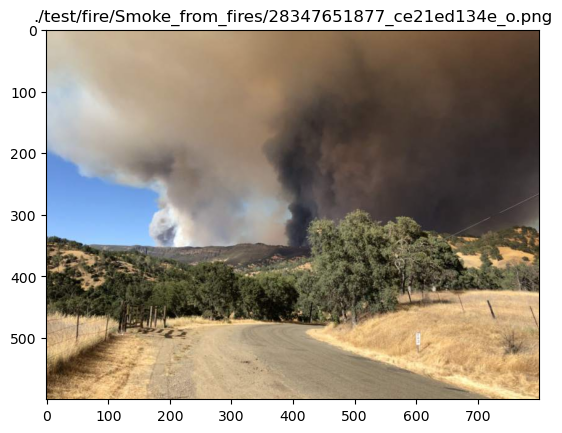

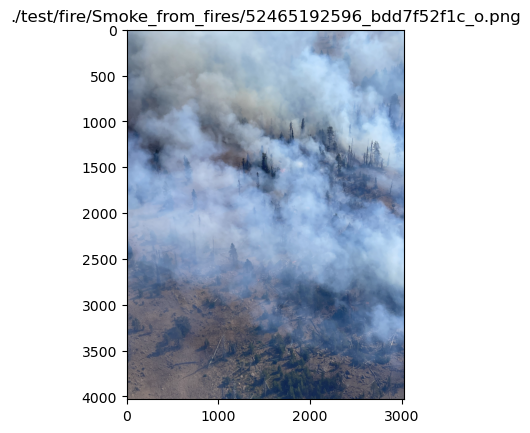

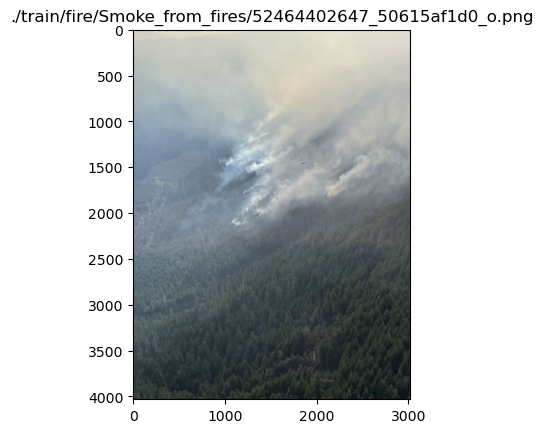

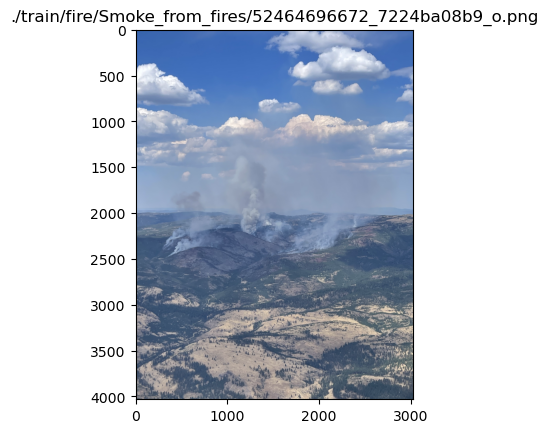

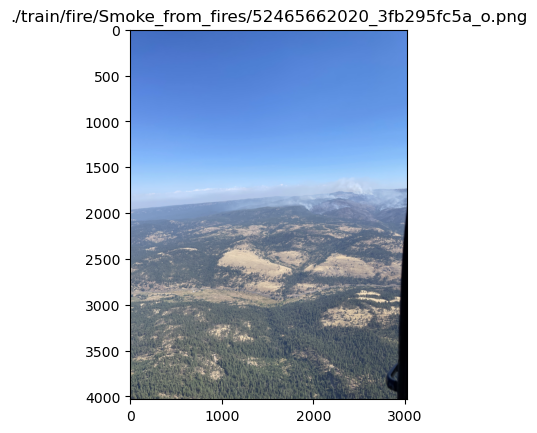

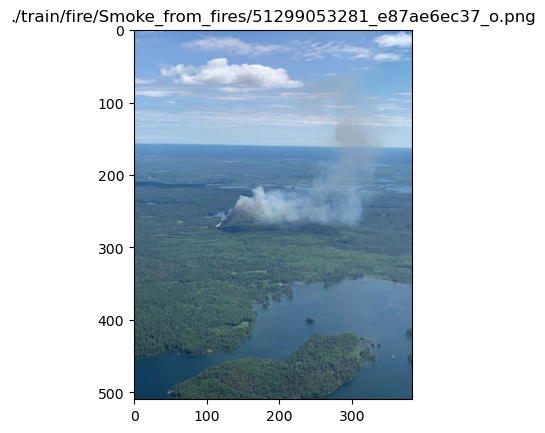

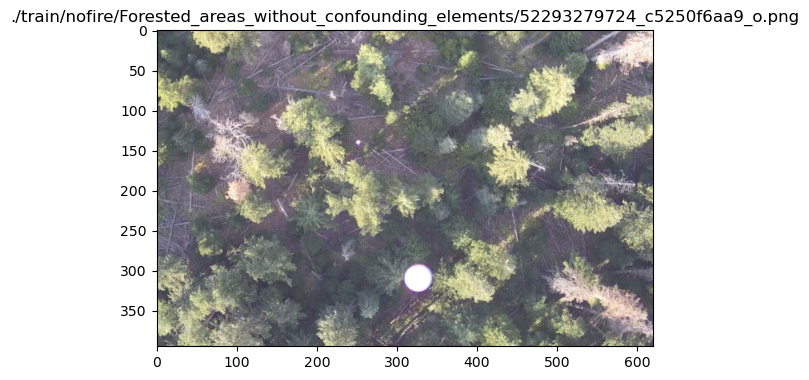

libpng warning: iCCP: known incorrect sRGB profile


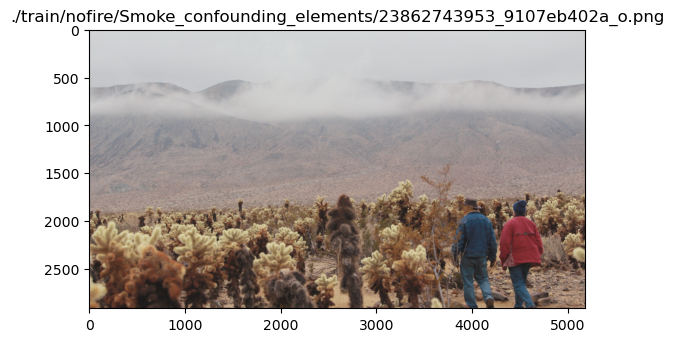

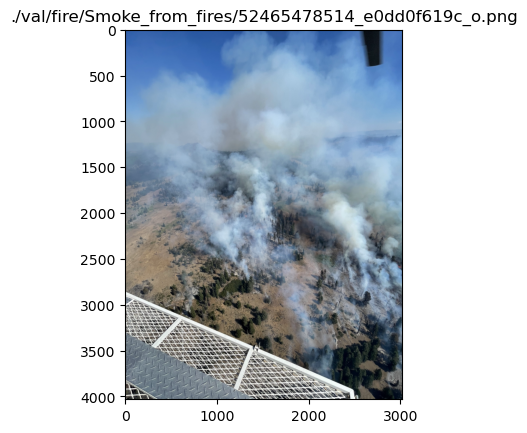

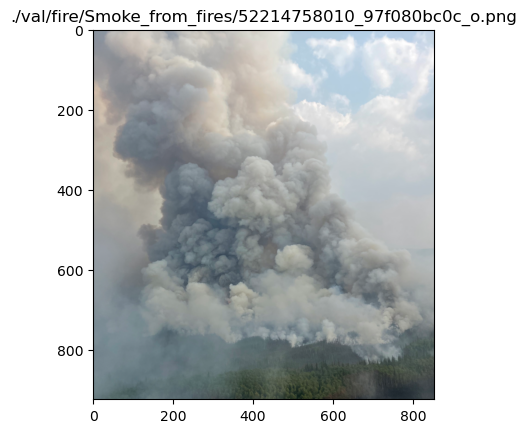

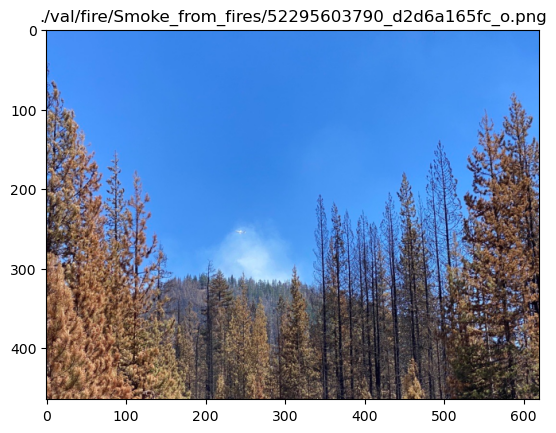

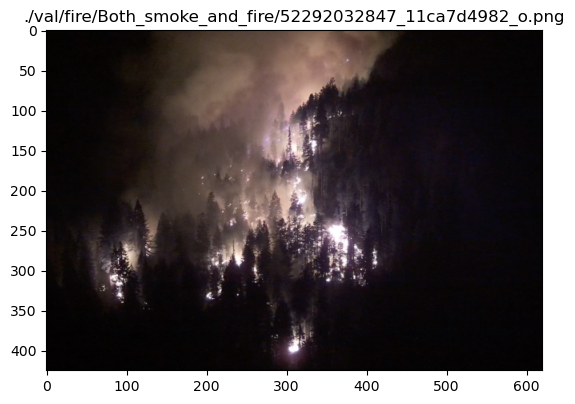

In [43]:
# change to directory containing images
curr_dir = os.getcwd()
os.chdir('../data_preprocessing/03_wildfire_dataset/')

for image in df_wrong_channels['item'].values:
    display_image(image)
    

os.chdir(curr_dir)

We'll use PIL to convert all images to RGB

## Changing from 4 Channels (RGBA) to 3 Channels (RGB)

In [44]:
from src.data.image_prep import update_channels

In [45]:
help(update_channels)

Help on function update_channels in module src.data.image_prep:

update_channels(path_to_dataset, df_wrong_channels)
    Function that updates the number of channels present in an image by converting it to RGB.
    It accepts JPEG or PNG images.

    Parameters
    ----------
    path_to_dataset : string
        Path (absolute or relative) to contents of image dataset folder.
        The dataset is assumed to have the following structure
        dataset/
            folder1/
                subfolder1.1/
            folder2/
                subfolder2.1/
                subfolder2.2/
            folder3/
    df_wrong_channels : pandas dataframe
        A dataframe created by `all_images_list()` listing all the images with 'wrong' number
        of channels (ie != 3).
        It is assumed to have the following columns:
        `item`, `label`,`channels`,`height`,`width`

    Returns
    -------
    Dataframe
        Original `df_wrong_channels` with an additonal column (`rgb_item`) con

In [46]:
df_wrong_channels

label                                               item  channels  \
36        1  ./test/fire/Smoke_from_fires/28347651877_ce21e...         4   
43        1  ./test/fire/Smoke_from_fires/52465192596_bdd7f...         4   
453       1  ./train/fire/Smoke_from_fires/52464402647_5061...         4   
585       1  ./train/fire/Smoke_from_fires/52464696672_7224...         4   
746       1  ./train/fire/Smoke_from_fires/52465662020_3fb2...         4   
805       1  ./train/fire/Smoke_from_fires/51299053281_e87a...         4   
1610      0  ./train/nofire/Forested_areas_without_confound...         4   
2177      0  ./train/nofire/Smoke_confounding_elements/2386...         4   
2310      1  ./val/fire/Smoke_from_fires/52465478514_e0dd0f...         4   
2327      1  ./val/fire/Smoke_from_fires/52214758010_97f080...         4   
2357      1  ./val/fire/Smoke_from_fires/52295603790_d2d6a1...         4   
2417      1  ./val/fire/Both_smoke_and_fire/52292032847_11c...         4   

      width  height issues  
36      800     600     no  
43     3024    4032     no  
453    3024    4032     no  
585    3024    4032     no  
746    3024    4032     no  
805     383     510     no  
1610    620     395     no  
2177   5184    2912     no  
2310   3024    4032     no  
2327    853     925     no  
2357    620     465     no  
2417    620     425     no

In [47]:
path_to_dataset

'../data_preprocessing/03_wildfire_dataset/'

In [48]:
df_wrong_channels = update_channels(path_to_dataset,df_wrong_channels)
df_wrong_channels

Converting ./test/fire/Smoke_from_fires/28347651877_ce21ed134e_o.png to RGB
Converting ./test/fire/Smoke_from_fires/52465192596_bdd7f52f1c_o.png to RGB
Converting ./train/fire/Smoke_from_fires/52464402647_50615af1d0_o.png to RGB
Converting ./train/fire/Smoke_from_fires/52464696672_7224ba08b9_o.png to RGB
Converting ./train/fire/Smoke_from_fires/52465662020_3fb295fc5a_o.png to RGB
Converting ./train/fire/Smoke_from_fires/51299053281_e87ae6ec37_o.png to RGB
Converting ./train/nofire/Forested_areas_without_confounding_elements/52293279724_c5250f6aa9_o.png to RGB
Converting ./train/nofire/Smoke_confounding_elements/23862743953_9107eb402a_o.png to RGB
Converting ./val/fire/Smoke_from_fires/52465478514_e0dd0f619c_o.png to RGB
Converting ./val/fire/Smoke_from_fires/52214758010_97f080bc0c_o.png to RGB
Converting ./val/fire/Smoke_from_fires/52295603790_d2d6a165fc_o.png to RGB
Converting ./val/fire/Both_smoke_and_fire/52292032847_11ca7d4982_o.png to RGB


label                                               item  channels  \
36        1  ./test/fire/Smoke_from_fires/28347651877_ce21e...         4   
43        1  ./test/fire/Smoke_from_fires/52465192596_bdd7f...         4   
453       1  ./train/fire/Smoke_from_fires/52464402647_5061...         4   
585       1  ./train/fire/Smoke_from_fires/52464696672_7224...         4   
746       1  ./train/fire/Smoke_from_fires/52465662020_3fb2...         4   
805       1  ./train/fire/Smoke_from_fires/51299053281_e87a...         4   
1610      0  ./train/nofire/Forested_areas_without_confound...         4   
2177      0  ./train/nofire/Smoke_confounding_elements/2386...         4   
2310      1  ./val/fire/Smoke_from_fires/52465478514_e0dd0f...         4   
2327      1  ./val/fire/Smoke_from_fires/52214758010_97f080...         4   
2357      1  ./val/fire/Smoke_from_fires/52295603790_d2d6a1...         4   
2417      1  ./val/fire/Both_smoke_and_fire/52292032847_11c...         4   

      width  height issues                                           rgb_item  
36      800     600     no  ./test/fire/Smoke_from_fires/28347651877_ce21e...  
43     3024    4032     no  ./test/fire/Smoke_from_fires/52465192596_bdd7f...  
453    3024    4032     no  ./train/fire/Smoke_from_fires/52464402647_5061...  
585    3024    4032     no  ./train/fire/Smoke_from_fires/52464696672_7224...  
746    3024    4032     no  ./train/fire/Smoke_from_fires/52465662020_3fb2...  
805     383     510     no  ./train/fire/Smoke_from_fires/51299053281_e87a...  
1610    620     395     no  ./train/nofire/Forested_areas_without_confound...  
2177   5184    2912     no  ./train/nofire/Smoke_confounding_elements/2386...  
2310   3024    4032     no  ./val/fire/Smoke_from_fires/52465478514_e0dd0f...  
2327    853     925     no  ./val/fire/Smoke_from_fires/52214758010_97f080...  
2357    620     465     no  ./val/fire/Smoke_from_fires/52295603790_d2d6a1...  
2417    620     425     no  ./val/fire/Both_smoke_and_fire/52292032847_11c...

## Update Dataframe with Converted Images

In [49]:
# Make a loope over the indices in `df_wrong_channels`

for index in df_wrong_channels.index:
    df.at[index,'item'] = df_wrong_channels.at[index,'rgb_item']
    df.at[index,'channels'] = 3

In [50]:
df['channels'].value_counts()

channels
3    2699
Name: count, dtype: int64

## Get Total Number of Images and Class Distributions
I want to count how many images on each subfolder

In [51]:
df.groupby('label').count()['item']/df.shape[0]

label
0    0.61282
1    0.38718
Name: item, dtype: float64

We see a 60/40 distribution for non-fire and fire images.

In [52]:
df.describe()

label  channels         width       height
count  2699.000000    2699.0   2699.000000  2699.000000
mean      0.387180       3.0   4056.130789  3154.566506
std       0.487196       0.0   1868.084936  1387.803231
min       0.000000       3.0    153.000000   206.000000
25%       0.000000       3.0   3008.000000  2304.000000
50%       0.000000       3.0   4000.000000  3024.000000
75%       1.000000       3.0   5312.000000  3988.000000
max       1.000000       3.0  19699.000000  8974.000000

On average they are 4056 by 3154 pixels. All images now have 3 channels.

# Save DataFrame to csv
This will be our final checkpoint. We will use this file in another notebook to resize the images in the dataset and make the annotations files.

In [53]:
df.to_csv('03_image_list_updated.csv',index = False)